 # Time Series Data Set, Time Series Components, and Autocorrelation.

### Import required packages.

In [40]:
from pathlib import Path

import pandas as pd
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools
from statsmodels.graphics import tsaplots
from statsmodels.tsa import stattools
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf

import matplotlib.pylab as plt
%matplotlib inline


### Create time series data set.

In [41]:
# Create data frame.
Amtrak_data = pd.read_csv('Amtrak.csv')

# Convert the date information to a datetime object as monthly data.
Amtrak_data['Date'] = pd.to_datetime(Amtrak_data.Month, format='%m/%d/%Y')

# Convert data frame column to time series (name is used 
# to label the data).
ridership_ts = pd.Series(Amtrak_data.Ridership.values, 
                  index=Amtrak_data.Date, name='Ridership')

# Define the time series frequency.
ridership_ts.index = pd.DatetimeIndex(ridership_ts.index, 
                        freq=ridership_ts.index.inferred_freq)

# Show/print first 5 records of the time series dataset.
ridership_ts.head()

Date
1991-01-01    1708.917
1991-02-01    1620.586
1991-03-01    1972.715
1991-04-01    1811.665
1991-05-01    1974.964
Freq: MS, Name: Ridership, dtype: float64

### Develop time series components and plot them.

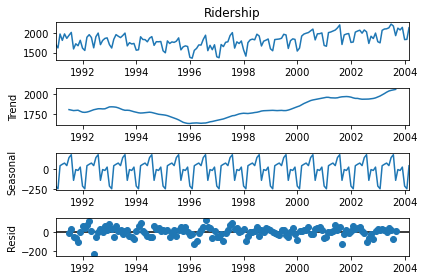

In [42]:
# Use seasonal_decompose to develop time series components.
ridership_stl = seasonal_decompose(ridership_ts, model='additive')

# Plot time series components.
ridership_stl.plot()
plt.show()


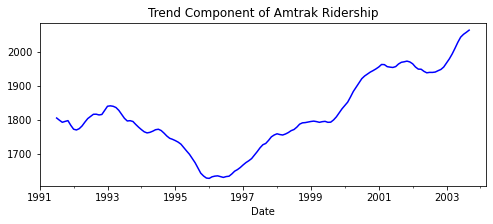

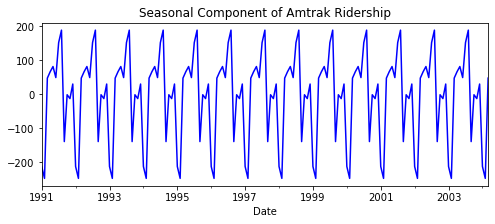

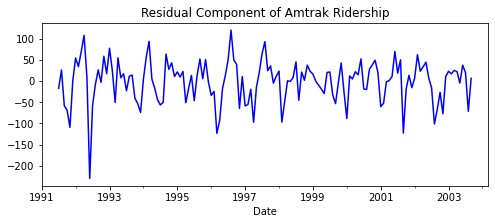

In [43]:
# Use seasonal_decompose to develop time series components.
ridership_stl = seasonal_decompose(ridership_ts, model='additive')

# Use functions trend(), seasonal(), and resid()
# to print time series components separately.

# Trend component plot.
ax = ridership_stl.trend.plot(figsize = (8,3), color = "blue")
plt.title('Trend Component of Amtrak Ridership') 
plt.show()

# Seasonal compoenet plot.
ax1 = ridership_stl.seasonal.plot(figsize = (8,3), color = "blue")
plt.title('Seasonal Component of Amtrak Ridership') 
plt.show()

# Residual component plot.
ax1 = ridership_stl.resid.plot(figsize = (8,3), color = "blue")
plt.title('Residual Component of Amtrak Ridership') 
plt.show()


### Develop and print autocorrelation graph and autocorrelation coefficients.

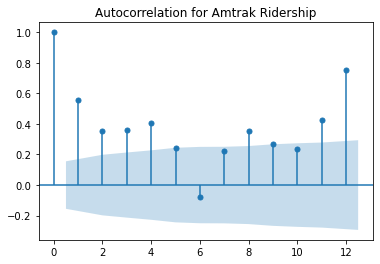

[ 1.          0.55984756  0.35537438  0.35977489  0.40408713  0.24514969
 -0.08131596  0.22445538  0.3536213   0.26988817  0.23571864  0.42428777
  0.75303093]


In [44]:
# Use plot_asf from tsaplots to develop autocorrelation 
# function and plot it. 
tsaplots.plot_acf(ridership_ts, lags = 12)
plt.title('Autocorrelation for Amtrak Ridership')
plt.show()

# Use stattools.acf fuction to calculate autocorrelation 
# coefficients and then print them using print().
print(stattools.acf(ridership_ts, nlags = 12, fft=False))